In [7]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import lib
import torch, numpy as np, pandas as pd, pytorch_lightning as pl, matplotlib.pyplot as plt
from torch import nn
from torchvision.transforms.functional import resize

In [9]:
opts = lib.get_default_opts()
opts['visualize_saliency'] = False

In [10]:
loaders = lib.get_loaders(opts)

In [11]:
batch = next(iter(loaders['valid']))

In [12]:
batch['image'].shape, batch['saliency'].shape

(torch.Size([16, 3, 384, 512]), torch.Size([16, 1, 384, 512]))

In [15]:
device = torch.device('cpu')
model = lib.Model(opts)
model.load_state_dict(torch.load('/home/26a_kir@lab.graphicon.ru/experiments-with-saliency/checkpoints/multiple-concat-fusion-sal-plus-one-3/best_date=2023-02-13_09:57_val_srocc=0.896_epoch=13.ckpt')['state_dict'])

<All keys matched successfully>

In [16]:
trainer = pl.Trainer(
    accelerator='gpu',
    devices=[3]
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [17]:
trainer.validate(model, loaders['test_clive'])

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validation: 0it [00:00, ?it/s]

[Epoch   0] VALID plcc: 0.84, srocc: 0.83, loss: 288.99 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val/loss             288.9894714355469
        val/plcc            0.8398840929967297
        val/srocc            0.833321276473706
        val_srocc            0.833321276473706
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/srocc': 0.833321276473706,
  'val/plcc': 0.8398840929967297,
  'val/loss': 288.9894714355469,
  'val_srocc': 0.833321276473706}]

In [18]:
model.eval()
print()

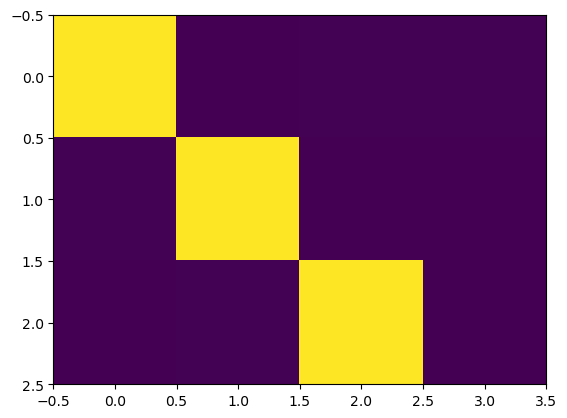

: 

In [29]:
plt.imshow(model.concat_convs[0].weight.squeeze().detach())